# Validation and Convergence

In [1]:
# Amira Abdel-Rahman
# (c) Massachusetts Institute of Technology 2021

In [2]:
plotting=true
GPU=false
logging=true
include("../julia/MetaVoxels.jl") #load MetaVoxels!

Loaded MetaVoxels Functions!


In [3]:
simName= "tutorial" # set name for simulation
# get a saved setup from an external julia file
# include("./julia/examples/thermalTest.jl") #template for multimaterial hierarchical voxels with different thermal coefficient of thermal expansion 
include("../julia/examples/latticeTestCHI.jl") #template for lattice voxel (big scale with real params)


## recompile these just for sanity check for dynamic loads
include("../julia/MetaVoxels.jl") 

#export setup using nodejs and javascript from "./json/$(simName)Init.json" and save to "./json/$(simName).json"
exportJuliaSettingsUsingNode(setup,simName)

Loaded MetaVoxels Functions!
Success! Created structure with 54 nodes and 144 edges.


Process(`node ../node/app1.js tutorial`, ProcessExited(0))

In [4]:
setupSim=getSetup(simName); #get simulation from"./json/$(simName).json"
savedDataFolderPath="../json/$(simName)/" # make sure this folder exists, this is where the simulation result will be saved

setupSimFEA=getSetup(simName);

In [5]:
t=@timed setupSimFEA=solveFea(setupSimFEA);
time=t[2]
println("FEA took $time seconds")

FEA took 4.7119453 seconds


In [6]:
runMetaVoxels!(setupSim,savedDataFolderPath,"CPU")

dt: 4.33254712560697e-7, s: 53.033008588991066, mass: 7.86e-7, momentInertiaInverse: 449187.33208453
first timestep took 0.8551056 seconds
ran 54 nodes and 144 edges for 20000 time steps took 8.232625 seconds


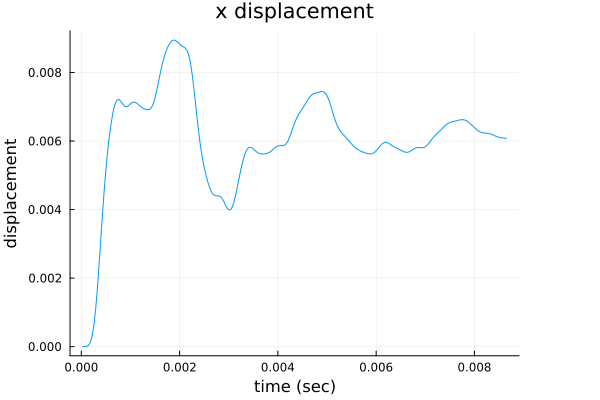

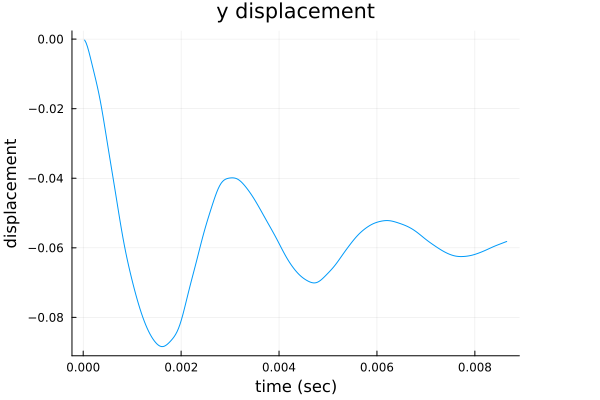

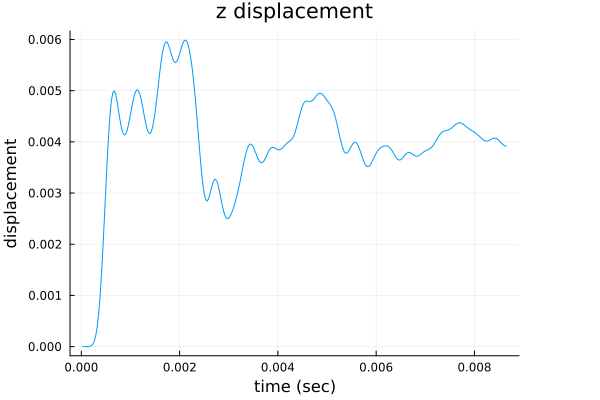

In [7]:
disXTime,disYTime,disZTime=plotDisplacementTroughTimeSteps(simName);


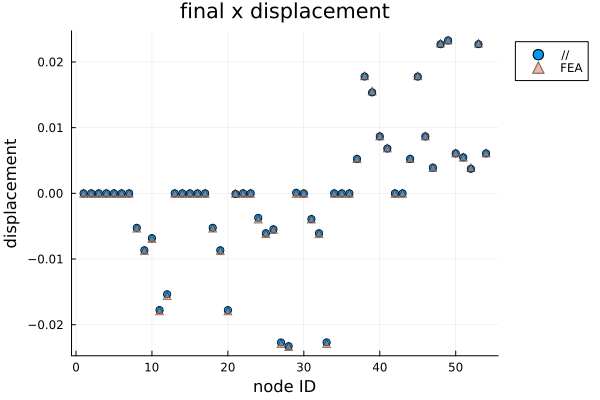

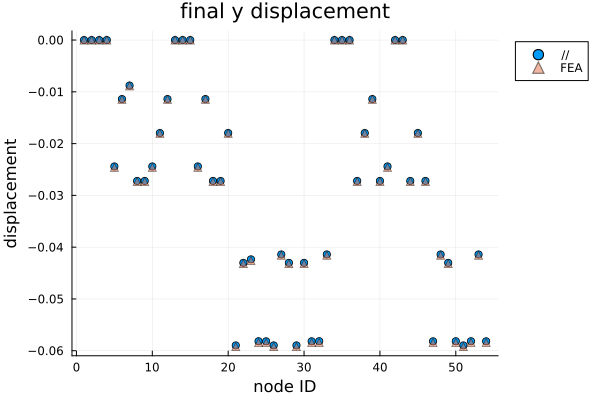

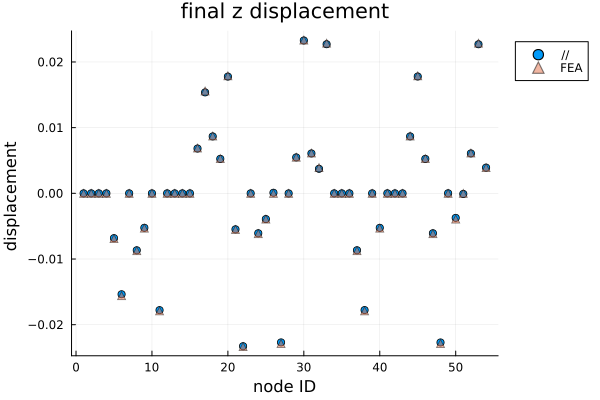

In [8]:
disX,disXFEA,disY,disYFEA,disZ,disZFEA=plotFinalDisplacementFEA(setupSimFEA,simName);

In [9]:
nodes=setupSimFEA["nodes"]
disXFEA=[]
disYFEA=[]
disZFEA=[]
thresholdMin=70
for node in nodes
    if node["position"]["y"]>thresholdMin 
        append!(disXFEA,[node["displacement"]["x"]])
        append!(disYFEA,[node["displacement"]["y"]])
        append!(disZFEA,[node["displacement"]["z"]])
    end
end
println(disXFEA)
println(disYFEA)
println(disZFEA)

Any[-2.6020852139652106e-18, -0.005299429804846953, -0.008731607720105632, -0.006897609976253922, -6.071532165918825e-18, -0.0052994298048469266, -0.008731607720105604, -1.3877787807814457e-17, -1.214306433183765e-17, -3.0357660829594124e-17, -0.003915501613031398, -0.006136781423264903, -0.005503048685623322, -0.022865546699831155, -0.02333657871910606, 3.469446951953614e-17, -4.336808689942018e-18, -0.003915501613031353, -0.006136781423264897, -0.022865546699831107, 0.005299429804846939, 0.008731607720105602, 0.006897609976253882, 0.0052994298048469266, 0.00873160772010557, 0.003915501613031393, 0.022865546699831218, 0.02333657871910603, 0.006136781423264912, 0.005503048685623305, 0.003915501613031204, 0.02286554669983104, 0.006136781423264754]
Any[-0.024581193401557993, -0.027311748198852865, -0.027311748198852882, -0.02458119340155802, -0.024581193401558028, -0.027311748198852806, -0.027311748198852796, -0.05920294059016198, -0.04316965647352781, -0.042586100460817865, -0.058411426

In [253]:
setupViz=getSetup1("$(simName)/0")
maxNumFiles=setupViz["maxNumFiles"]
setupVizLast=getSetup1("$(simName)/$(Int(maxNumFiles-1))");
nodes=setupVizLast["nodes"]
disX=[]
disY=[]
disZ=[]
for node in nodes
    if node["position"]["y"]>thresholdMin 
        append!(disX,[node["displacement"]["x"]])
        append!(disY,[node["displacement"]["y"]])
        append!(disZ,[node["displacement"]["z"]])
    end
end

println(disX)
println(disY)
println(disZ)

Any[2.4918185636631558e-6, -0.005314446632857914, -0.008757808837657819, -0.00691465585598633, -2.3984554695984247e-6, -0.005313324651407688, -0.008762153683809601, -9.05610234752687e-5, 7.925893901148075e-6, -8.859508808124813e-7, -0.0038093331882398294, -0.006137856142860762, -0.005515073451929299, -0.02290740435553136, -0.02342808207752516, 9.23764850257739e-5, -8.074321141297682e-6, -0.003996883170200984, -0.006138004631503873, -0.022898289168209445, 0.005313492101462481, 0.008762320945017641, 0.0069145869695003016, 0.005313806607284754, 0.00875719996361003, 0.003998741099593517, 0.022900624220393018, 0.023430825945862658, 0.006139839113605127, 0.005516820083874279, 0.003809545684607991, 0.0229070667840503, 0.006138111790789042]
Any[-0.024685822425943554, -0.027448810453765606, -0.027441062463282102, -0.02468667727313683, -0.024686650324650963, -0.02744068821605318, -0.027448683731368106, -0.05944488444002691, -0.043359226167715495, -0.042762165484242, -0.058603154098221415, -0.058

In [202]:
nodes=setupSimFEA["nodes"]
pdisXFEA=[]
pdisYFEA=[]
pdisZFEA=[]
thresholdMin=70
for node in nodes
    if node["position"]["y"]>thresholdMin 
        append!(pdisXFEA,[node["position"]["x"]])
        append!(pdisYFEA,[node["position"]["y"]])
        append!(pdisZFEA,[node["position"]["z"]])
    end
end
println(pdisXFEA)
println(pdisYFEA)
println(pdisZFEA)

Any[75, 0, 37.5, 37.5]
Any[75, 75, 75, 75]
Any[37.5, 37.5, 0, 75]


## 5. Visualize 
(only need to run it once to open the server then press stop, the server will keep running and other changes will update automatically.. will change later)

In [59]:
#run node.js to serve the indexTutorial.html for visualizarion
mycommand = `node ../node/serve.js $(simName)`
run(mycommand)

# vis 1 stable
# http://localhost:8080/demos/indexTutorial.html

# vis 2 faster for larger simulations
# http://localhost:8080/demos/indexTutorialGraph.html

# vis 3 (GPU Shaders) even faster (max 40 timesteps)

Server listening on port 8000
Open http://localhost:8000/demos/indexTutorialGraph.html in your browser


LoadError: InterruptException: